<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Python en ciencias e ingeniería: tutoriales basados en ejemplos</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo y Adrián Navas Montilla</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>.

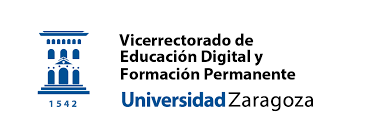

---
Producción de contenidos educativos digitales UNIZAR 2022-2023

**Objetos de aprendizaje abiertos del Vicerrectorado de Educación Digital y Formación Permanente de la Universidad de Zaragoza en el marco del Proyecto UniProducción incluido en el Plan UniDigital.**
---



## <center> Introducción: cálculo vectorial utilizando Jupyter Notebook </center>


-----------------------------------------


Esto es un cuaderno interactivo donde podemos añadir celdas de texto (como esta), o celdas de código (como la celda inferior). Las celdas de texto permiten escribir texto con *distintos* **formatos** y ecuaciones como esta:
$$c=a·b$$
Para editar una celda de texto basta con hacer doble click en ella. Las celdas de código permiten ejecutar código en lenguaje Python, por ejemplo, podemos asignar valores a las variables $a$ y $b$ de la fórmula anterior y calcular $c$, como si de una calculadora de tratara:

In [ ]:
a= 2.0
b= 3.0
c=a*b

print("El resultado de a*b es:",c) #la función print() permite mostrar
                                   #por pantalla texto y variables numéricas o simbólicas

El resultado de a*b es: 6.0


Lo primero que debemos hacer es cargar las librerías necesarias de Python. Como vamos a trabajar con cálculo simbólico y numérico cargaremos las librerías ```sympy``` y ```numpy```. Además, para hacer representaciones gráficas cargaremos la librería ```matplotlib```. En la siguiente celda de código se cargan estas librerías:

In [ ]:
from sympy import *             # Librería para trabajo simbólico
import numpy as np              # Librería para cálculo numérico
import math                     # Librería para utilizar símbolos matemáticos
                                # como el número pi, que se escribe como math.pi
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas
from IPython.display import display

### Aprendiendo a trabajar con vectores

Para definir un vector utilizaremos el comando ```Matrix()```. Vamos a definir dos vectores $\vec{\mathbf{u}}=(1,2,0)$ y $\vec{\mathbf{v}}=(3,3,1)$ de 3 componentes:

In [ ]:
u=Matrix([[1,2,0]])
v=Matrix([[3,3,1]])

print("El vector u es:")
display(u)
print("Sus componentes son:",u[0],u[1],u[2])

print("\nEl vector v es:")
display(v)
print("Sus componentes son:",v[0],v[1],v[2])

El vector u es:


Matrix([[1, 2, 0]])

Sus componentes son: 1 2 0

El vector v es:


Matrix([[3, 3, 1]])

Sus componentes son: 3 3 1


Podemos realizar facilmente el **producto escalar** entre ellos:

$$w=\vec{\mathbf{u}}\cdot\vec{\mathbf{v}}=(u_1,u_2,u_3)·\left(\begin{array}{c}
v_1\\
v_2\\
v_3
\end{array}
\right)=u_1v_1+u_2v_2+u_3v_3=1·3+2·3+0·3=9$$

de la siguiente manera:

In [ ]:
w=u.dot(v) #significa u multiplicado escalarmente por v
print("El producto escalar es:")
print(w)

El producto escalar es:
9


In [ ]:
import numpy as np
u2=np.array(u)
v2=np.array(v)
v2=np.reshape(v2,(3,1))
print(u2.shape,v2.shape)
w2=u2@v2
print("El producto escalar es:")
print(w2)

(1, 3) (3, 1)
El producto escalar es:
[[9]]


Observando que el producto vectorial da como resultado un **escalar**, ya que:

$$w=\vec{\mathbf{u}}\cdot\vec{\mathbf{v}}=
|\vec{\mathbf{u}}| |\vec{\mathbf{v}}| \cos \theta$$

donde $\theta$ es el ángulo entre los vectores.


También podemos calcular el **producto vectorial**

$$\vec{\mathbf{w}}=\vec{\mathbf{u}}\times\vec{\mathbf{v}}=\left(
\begin{array}{c}
u_2v_3-v_2u_3\\
v_1u_3-u_1v_3\\
u_1v_2-v_1u_2
\end{array}
\right)=\left(
\begin{array}{c}
2·1-3·0\\
3·0-1·1\\
1·3-3·2
\end{array}
\right)
$$

 de la siguiente manera:

In [ ]:
w=u.cross(v) #significa u multiplicado vectorialmente por v
print("El producto vectorial es:")
display(w)

El producto vectorial es:


Matrix([[2, -1, -3]])

Observando que el producto vectorial da como resultado un **vector**. Recordad que la dirección de $\vec{\mathbf{w}}$ será la del vector ortogonal a los vectores $\vec{\mathbf{u}}$ y $\vec{\mathbf{v}}$ según la regla de la mano derecha:

 <img src="https://upload.wikimedia.org/wikipedia/commons/7/71/Producto_vectorial_2.png"  width="200">


### Introducción al cálculo diferencial con funciones de varias variables: gradiente

En este apartado vamos a aprender a definir funciones, calcular sus derivadas, etc. Consideremos la siguiente función correspondiente a un campo escalar de potencial electrostático en 2 dimensiones:

$$ ϕ(x,y) = x^2 + y^2 + 10 $$


Las variables $x$ e $y$ de las que depende la función debemos declararlas como variables simbólicas, ya que todavía no les hemos asignado un valor numérico


In [ ]:
x,y=symbols('x y') #Declaramos x e y como variable simbólica:
                   #nos permite "arrastrarla" como un símbolo hasta que decidamos darle valor.

Para definir la función $\phi(x,y)$ haremos lo siguiente:

In [ ]:
def phi(x,y):
    return  x**2+y**2+10

Y para evaluarla en un punto (p. ej en $x=1.7$ y $y=1.5$), podemos hacerlo de dos maneras distintas:

In [ ]:
#Opcion 1
print(phi(1.7,1.5))
#Opcion 2
print(phi(x,y).subs([(x,1.7),(y,1.5)]))

15.14
15.1400000000000


Antes de continuar, vamos a hacer una representación gráfica de esta función en el dominio espacial $[0,2]\times[0,2]$

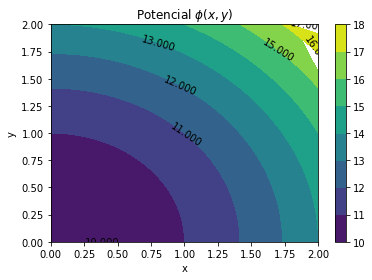

In [ ]:
L=2                           #longitud del dominio
N = 100                       #espaciado entre puntos
xp = np.linspace(0, L, N)     #puntos en x
yp = np.linspace(0, L, N)     #puntos en y
X, Y = np.meshgrid(xp, yp)    #matriz de puntos
Z = phi(X,Y)                    #valores de phi(x,y) en los puntos

fig, ax = plt.subplots()      #genera el objeto "figura"
CS = ax.contourf(X, Y, Z)     #hace la representación gráfica

#Esto es para configurar ejes, barra de color, etiquetas, etc...
ax.clabel(CS, inline=True, fontsize=10, colors='black')
ax.set_title('Potencial $\phi(x,y)$')
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(CS)

También podemos hacer gráficas en una dimensión (más sencillas). Por ejemplo, podemos representar $\phi(x,y)$ a lo largo del eje $x$ (es decir, haciendo $y=0$):

Text(0, 0.5, '$\\phi(x,0)$')

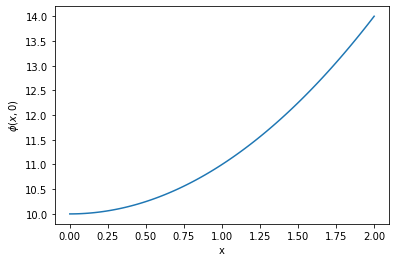

In [ ]:
L=2                           #longitud del dominio
N = 100                       #espaciado entre puntos
xp = np.linspace(0, L, N)     #puntos en x
pot = phi(xp,0.0)

fig, ax  = plt.subplots() #genera el objeto "figura"
ax.plot(xp,pot)          #pinta la gráfica
ax.set_xlabel("x")
ax.set_ylabel("$\phi(x,0)$")



### Gradiente

Ahora vamos a aprender a calcular una derivada parcial de una función. En este caso calcularemos las derivadas parciales de $\phi(x,y)$ respecto de $x$ e $y$:

$$\frac{\partial \phi(x,y)}{\partial x} \hbox{     y     } \frac{\partial \phi(x,y)}{\partial y}$$

para ello, utilizamos el método ```diff()``` :

In [ ]:
dphidx = phi(x,y).diff(x) #calcula la derivada parcial respecto a x
dphidy = phi(x,y).diff(y) #calcula la derivada parcial respecto a y

print('La derivada de $\phi$ respecto de x es=',dphidx)
print("La derivada de $\phi$ respecto de y es =",dphidy)

La derivada de $\phi$ respecto de x es= 2*x
La derivada de $\phi$ respecto de y es = 2*y


Dado que $\phi(x,y)$ es un campo escalar en dos dimensiones, es muy útil el uso del **gradiente** para calcular variaciones en el plano $x,y$ y direcciones de máxima variación. El gradiente de $\phi(x,y)$ es un vector en cuyas componentes tenemos las derivadas de $\phi$ respecto de las distintas coordenadas espaciales:

$$\nabla \phi(x,y)=\left(\begin{array}{c}
\frac{\partial \phi(x,y)}{\partial x}\\
\frac{\partial \phi(x,y)}{\partial y}
\end{array}
\right)$$

donde $\nabla$ es el operador nabla. Vamos a construir el gradiente de $\phi$:

In [ ]:
gradphi=Matrix([[dphidx,dphidy]]) #dphidx y dphidy las hemos calculado en la
                                  #celda de código anterior

print("El vector gradiente de $\phi(x,y)$ es:")
display(gradphi)

El vector gradiente de $\phi(x,y)$ es:


Matrix([[2*x, 2*y]])

Ahora vamos a representar el gradiente (que es un campo vectorial) sobre la representación gráfica del potencial:

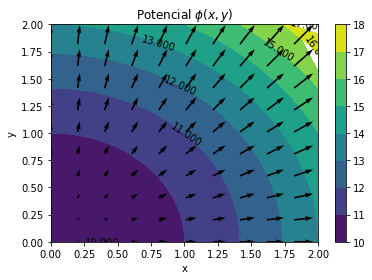

In [ ]:
L=2                           #longitud del dominio
N = 100                       #espaciado entre puntos
nq=10

xp = np.linspace(0, L, N)     #puntos en x
yp = np.linspace(0, L, N)     #puntos en y
X, Y = np.meshgrid(xp, yp)    #matriz de puntos
Z = phi(X,Y)                    #valores de T(x,y) en los puntos

Gx=np.zeros((len(yp),len(xp)))
Gy=np.zeros((len(yp),len(xp)))
for i in range(0,len(xp)):
    for j in range(0,len(yp)):
        Gx[j][i] = dphidx.subs([(x,xp[i]),(y,yp[j])])
        Gy[j][i] = dphidy.subs([(x,xp[i]),(y,yp[j])])

fig, ax = plt.subplots()      #genera el objeto "figura"
CS = ax.contourf(X, Y, Z)     #hace la representación gráfica
QV = ax.quiver(X[::nq,::nq], Y[::nq,::nq], Gx[::nq,::nq], Gy[::nq,::nq])

#Esto es para configurar ejes, barra de color, etiquetas, etc...
ax.clabel(CS, inline=True, fontsize=10, colors='black')
ax.set_title('Potencial $\phi(x,y)$')
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(CS)

Como vemos en la figura anterior, el gradiente muestra la dirección de máxima variación de $\phi(x,y)$.

**Derivada direccional**. Si queremos calcular la variación de  $\phi(x,y)$ en una dirección $\hat{\mathbf{n}}$ cualquiera, lo haremos mediante la derivada direccional, que es el producto escalar:

$$D_{\hat{\mathbf{n}}}\phi(x,y)=\hat{\mathbf{n}}\cdot\nabla \phi(x,y)$$

Vamos a calcular la derivada direccional de $\phi(x,y)$ en el punto $(1,0)$ en las direcciones $\hat{\mathbf{n}}_1=(1,0)$, $\hat{\mathbf{n}}_2=(0,1)$ y $\hat{\mathbf{n}}_3=(1/\sqrt{2},1/\sqrt{2})$

In [ ]:
#definimos coordenadas del punto
xp=1.0
yp=0.0

#evaluamos el gradiente en el punto (xp,yp) dado
gradphipunto=gradphi.subs([(x,xp),(y,yp)])
print("El gradiente en (1,0) es")
display(gradphipunto)

#definimos el vector n=(1,0)
n1=Matrix([[1,0]])
n2=Matrix([[0,1]])
n3=Matrix([[1/np.sqrt(2),1/np.sqrt(2)]])

#calculamos la derivada direccional
dTn1=n1.dot(gradphipunto)
dTn2=n2.dot(gradphipunto)
dTn3=n3.dot(gradphipunto)
print("\nLa derivada direccional en direccion n1 es:")
print(dTn1)
print("\nLa derivada direccional en direccion n2 es:")
print(dTn2)
print("\nLa derivada direccional en direccion n3 es:")
print(dTn3)


El gradiente en (1,0) es


Matrix([[2.0, 0]])


La derivada direccional en direccion n1 es:
2.00000000000000

La derivada direccional en direccion n2 es:
0

La derivada direccional en direccion n3 es:
1.41421356237309


### Divergencia y rotacional de un campo vectorial

La divergencia de un campo $\vec F$ se calcula como el producto escalar del operador Nabla por el campo, que da lugar a un valor escalar:
 $$ \nabla \cdot \vec{\mathbf{v}}= \frac{\partial F_x}{\partial x}+\frac{\partial F_y}{\partial y}+\frac{\partial F_z}{\partial z}$$

y el rotacional como el producto vectorial del operador Nabla por el campo:
 $$
\nabla \times \vec{\mathbf{\vec F}}=\begin{bmatrix}{\frac {\partial F_z}{\partial y}}-{\frac {\partial F_y}{\partial z}}\\{\frac {\partial F_x}{\partial z}}-{\frac {\partial F_z}{\partial x}}\\{\frac {\partial F_y}{\partial x}}-{\frac {\partial F_x}{\partial y}}\end{bmatrix}
 $$

 Vamos a trabajar con el siguiente campo vectorial:

  $$ \vec{\mathbf{F}}= (2y^2,0,0)$$

y calcular la divergencia y el rotacional:

In [ ]:
x,y,z,t=symbols('x y z t')
F=Matrix([[2*sqrt(y),0,0]])

Fx=F[0]
Fy=F[1]
Fz=F[2]

dFxdx = Fx.diff(x)
dFydy = Fy.diff(y)
dFzdz = Fz.diff(z)

divF = dFxdx + dFydy+ dFzdz

print("La divergencia del flujo es",divF)

dFxdy = Fx.diff(y)
dFxdz = Fx.diff(z)

dFydx = Fy.diff(x)
dFydz = Fy.diff(z)

dFzdx = Fz.diff(x)
dFzdy = Fz.diff(y)

rot_x = dFzdy - dFydz
rot_y = dFxdz - dFzdx
rot_z = dFydx - dFxdy

rotF=Matrix([[rot_x,rot_y,rot_z]])

print("El rotacional del flujo es:")
display(simplify(rotF))

La divergencia del flujo es 0
El rotacional del flujo es:


Matrix([[0, 0, -1/sqrt(y)]])

Podemos ver que la divergencia cero, pero el campo tiene rotacional distinto de cero.

La representación vectorial del $\nabla \times \vec{\mathbf{\vec F}}$ se puede hacer de la siguiente forma:

Text(0, 0.5, 'y')

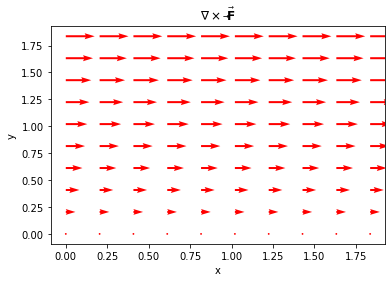

In [ ]:
L=2                           #longitud del dominio
N = 50                       #espaciado entre puntos
nq=5

xp = np.linspace(0, L, N)     #puntos en x
yp = np.linspace(0, L, N)     #puntos en y
X, Y = np.meshgrid(xp, yp)    #matriz de puntos

vx=np.zeros((len(yp),len(xp)))
vy=np.zeros((len(yp),len(xp)))
for i in range(0,len(xp)):
    for j in range(0,len(yp)):
        vx[j][i] = F[0].subs([(x,xp[i]),(y,yp[j])])
        vy[j][i] = F[1].subs([(x,xp[i]),(y,yp[j])])

fig, ax = plt.subplots()      #genera el objeto "figura"
QV2= ax.quiver(X[::nq,::nq], Y[::nq,::nq], vx[::nq,::nq], vy[::nq,::nq],color="r")

#Esto es para configurar ejes, barra de color, etiquetas, etc...
ax.set_title(r'$\nabla\times\vec{\mathbf{\vec F}}$')
ax.set_xlabel("x")
ax.set_ylabel("y")